In [129]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [130]:
ORG_DIR = 'fruits_original_dataset'
TEST_DIR = 'fruits_random_images'
RESNET = 'resnet_based.h5'
MINI = 'mini.h5'
ALEXNET = 'alexnet.h5'
IMG_SIZE_RESNET = (256, 256)
IMG_SIZE_OTHER = (32, 32)
INPUT_SHAPE_RESNET = IMG_SIZE_RESNET + (3,)
INPUT_SHAPE_OTHER = IMG_SIZE_OTHER + (3,)

In [131]:
def load_test_images(path, size):
    return tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    shuffle=False,
    image_size=size,
    batch_size=1)

In [132]:
def split_images_labels(dataset, size):
    images_labels = [(img.reshape(size), label[0]) for img, label in dataset.as_numpy_iterator()]
    images, labels = zip(*images_labels)
    return list(images), list(labels)

In [133]:
def visualise_predictions(dataset, predictions, size):
    converted_predictions = tf.where(predictions.flatten() < 0.5, 0, 1).numpy()
    images, labels = split_images_labels(dataset, size)
    num_images = len(images)
    num_rows = int(np.ceil(num_images / 3))
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(8, 8))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(images[i] / 255)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel(f"True: {labels[i]}\nPred: {converted_predictions[i]}", color='white')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

In [134]:
fruits_original_resnet = load_test_images(ORG_DIR, IMG_SIZE_RESNET)
fruits_test_resnet = load_test_images(TEST_DIR, IMG_SIZE_RESNET)

fruits_original_other = load_test_images(ORG_DIR, IMG_SIZE_OTHER)
fruits_test_other = load_test_images(TEST_DIR, IMG_SIZE_OTHER)

Found 9 files belonging to 2 classes.
Found 9 files belonging to 2 classes.
Found 9 files belonging to 2 classes.
Found 9 files belonging to 2 classes.


### Test AlexNet

In [135]:
alexnet = tf.keras.models.load_model(ALEXNET, compile=False)

#### Results of running the model on subset of orginal dataset

2024-01-26 23:21:25.108715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]
2024-01-26 23:21:25.109046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]


9/9 [==============================] - 0s 3ms/step


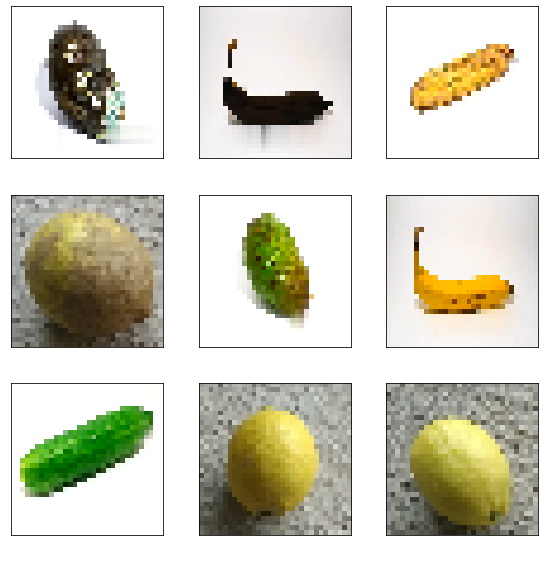

In [136]:
predictions = alexnet.predict(fruits_original_other)
visualise_predictions(fruits_original_other, predictions, INPUT_SHAPE_OTHER)

#### Results of running the model on various images from the internet

9/9 [==============================] - 0s 12ms/step


2024-01-26 23:21:26.923870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]
2024-01-26 23:21:26.924482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]


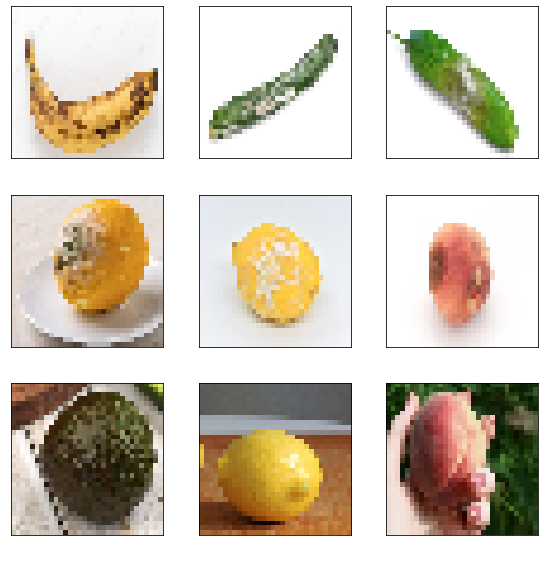

In [137]:
predictions = alexnet.predict(fruits_test_other)
visualise_predictions(fruits_test_other, predictions, INPUT_SHAPE_OTHER)

### Test custom CNN

In [138]:
mini = tf.keras.models.load_model(MINI, compile=False)

#### Results of running the model on subset of orginal dataset

9/9 [==============================] - 0s 3ms/step


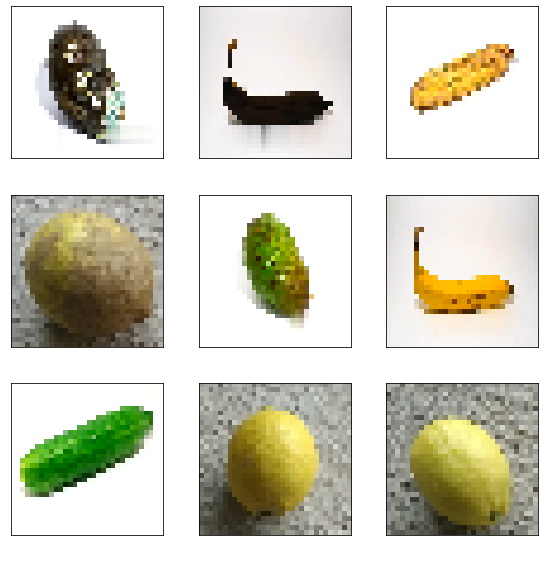

In [139]:
predictions = mini.predict(fruits_original_other)
visualise_predictions(fruits_original_other, predictions, INPUT_SHAPE_OTHER)

#### Results of running the model on various images from the internet

9/9 [==============================] - 0s 8ms/step


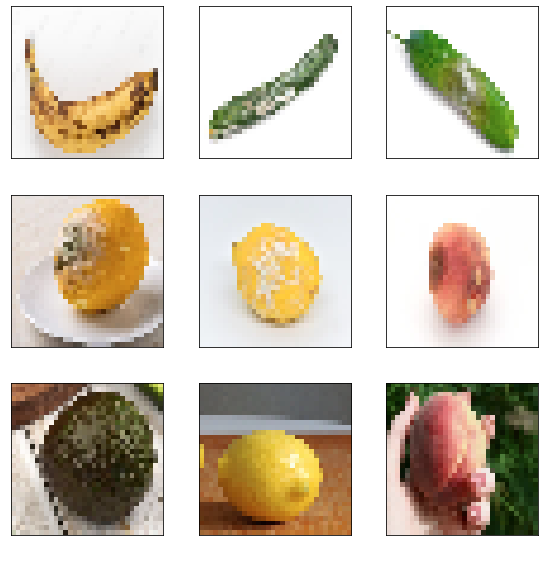

In [140]:
predictions = mini.predict(fruits_test_other)
visualise_predictions(fruits_test_other, predictions, INPUT_SHAPE_OTHER)

### Test ResNet

In [141]:
resnet = tf.keras.applications.resnet.ResNet152(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE_RESNET)
resnet.trainable = False

In [142]:
inputs = keras.Input(shape=INPUT_SHAPE_RESNET)
preprocess = tf.keras.applications.resnet.preprocess_input(inputs)
resnet = resnet(preprocess, training=False)
flatten = keras.layers.GlobalAveragePooling2D()(resnet)
resnet_based = keras.Model(inputs, flatten)

#### Results of running the model on subset of orginal dataset

In [143]:
extracted = resnet_based.predict(fruits_original_resnet)
classifier = tf.keras.models.load_model(RESNET, compile=False)
predictions = classifier.predict(extracted, verbose=0)

2024-01-26 23:21:38.026730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]
2024-01-26 23:21:38.027087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]


9/9 [==============================] - 8s 597ms/step


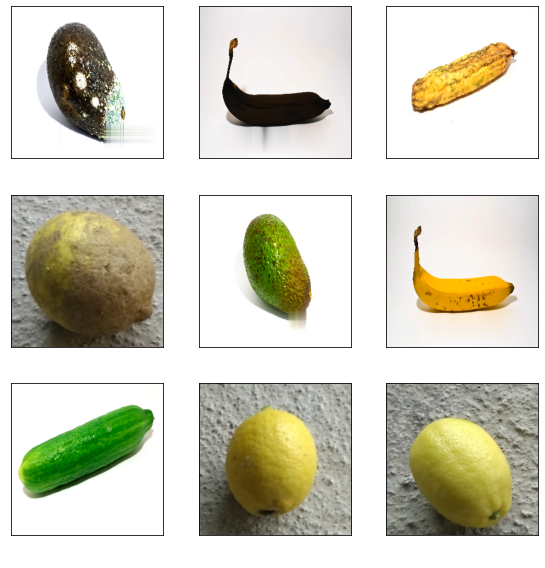

In [144]:
visualise_predictions(fruits_original_resnet, predictions, INPUT_SHAPE_RESNET)

#### Results of running the model on various images from the internet

In [145]:
extracted = resnet_based.predict(fruits_test_resnet)
classifier = tf.keras.models.load_model(RESNET, compile=False)
predictions = classifier.predict(extracted, verbose=0)

2024-01-26 23:21:47.254886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]
2024-01-26 23:21:47.255409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [9]
	 [[{{node Placeholder/_4}}]]


9/9 [==============================] - 5s 606ms/step


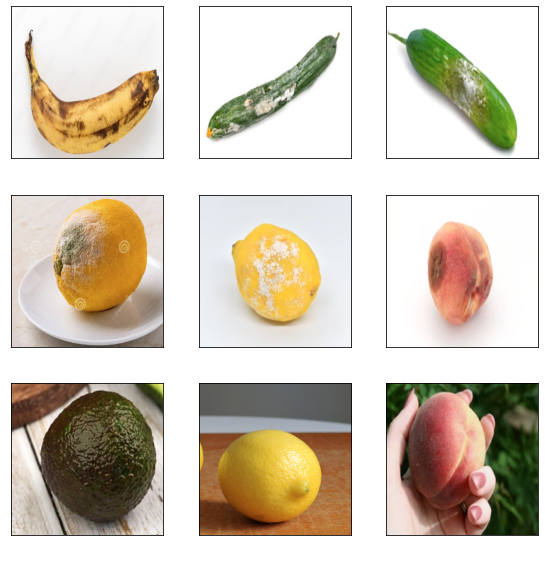

In [146]:
visualise_predictions(fruits_test_resnet, predictions, INPUT_SHAPE_RESNET)